In [1]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_21"

# Load the file
if os.path.isfile(binecode_path):
    g21 = Graph.load_from_file(binecode_path)
    print(g21)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=150531, number_of_vertices=34772, number_of_temporal_edges=272189086, earliest_time="72000000", latest_time="75599999")


In [1]:
import matplotlib.pyplot as plt
from raphtory import Graph

def plot_microservices_over_time(graphs):
    # Set the window sizes
    window_sizes = [30000, 60000, 600000, 3600000]

    # Labels for the legend
    window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

    # Initialise the plot with a set size
    plt.figure(figsize=(12,5))

    # Iterate over each window size
    for window_size, label in zip(window_sizes, window_labels):
        num_nodes = []
        time = []
        # Iterate over each graph in the list
        for g in graphs:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                # Convert time to hours from milliseconds
                time.append(windowed_graph.earliest_time / 3600000)
        
        # Plot the data for the current window size with a unique label
        plt.plot(time, num_nodes, label=label)

    # Apply customizations
    plt.xlabel("Time (hours)")
    plt.ylabel("Number of microservices")
    plt.title("Amount of Alibaba's microservices over time")

    # Add the legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

# Set the window sizes
window_sizes = [30000, 60000, 600000, 3600000]

# Labels for the legend
window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

# Iterate over each window size
for window_size, label in zip(window_sizes, window_labels):
    avg_degree = []
    time = []
    # Iterate over each graph in the list
    for g in graphs:
        for windowed_graph in g.rolling(window=window_size):
            result = windowed_graph.count_vertices()
            avg_degree.append(result)
            time.append(windowed_graph.earliest_time / 3600000)
    
    # Plot the data for the current window size with a unique label
    plt.plot(time, avg_degree, label=label)

# Apply customizations
plt.xlabel("Time (hours)")
plt.ylabel("Degree")
plt.title("Average degree over time")

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

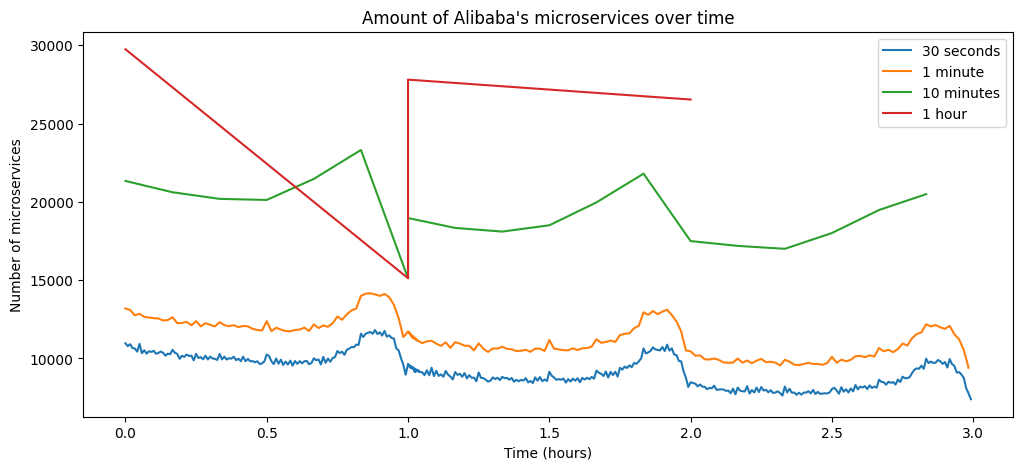

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

# Set the window sizes
window_sizes = [30000, 60000, 600000, 3600000]

# Labels for the legend
window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

# Iterate over each window size
for window_size, label in zip(window_sizes, window_labels):
    num_nodes = []
    time = []
    # Iterate over each graph in the list
    for g in graphs:
        for windowed_graph in g.rolling(window=window_size):
            result = windowed_graph.count_vertices()
            num_nodes.append(result)
            time.append(windowed_graph.earliest_time / 3600000)
    
    # Plot the data for the current window size with a unique label
    plt.plot(time, num_nodes, label=label)

# Apply customizations
plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

Loading graph from: C:/ms_bincode/Graph_1
Rank 1: MS_27421 with a score of 0.03301
Rank 2: MS_37691 with a score of 0.01591
Rank 3: MS_2827 with a score of 0.00608
Rank 4: MS_46825 with a score of 0.00534
Rank 5: MS_21883 with a score of 0.00313
Rank 6: MS_21537 with a score of 0.00280
Rank 7: MS_44585 with a score of 0.00217
Rank 8: MS_14728 with a score of 0.00201
Rank 9: MS_35973 with a score of 0.00190
Rank 10: MS_46708 with a score of 0.00190
Loading graph from: C:/ms_bincode/Graph_2
Rank 1: MS_27421 with a score of 0.03329
Rank 2: MS_37691 with a score of 0.01602
Rank 3: MS_2827 with a score of 0.00596
Rank 4: MS_46825 with a score of 0.00523
Rank 5: MS_21883 with a score of 0.00323
Rank 6: MS_21537 with a score of 0.00307
Rank 7: MS_44585 with a score of 0.00242
Rank 8: MS_19585 with a score of 0.00208
Rank 9: MS_46708 with a score of 0.00202
Rank 10: MS_14728 with a score of 0.00186
Loading graph from: C:/ms_bincode/Graph_3
Rank 1: MS_27421 with a score of 0.03354
Rank 2: MS_37

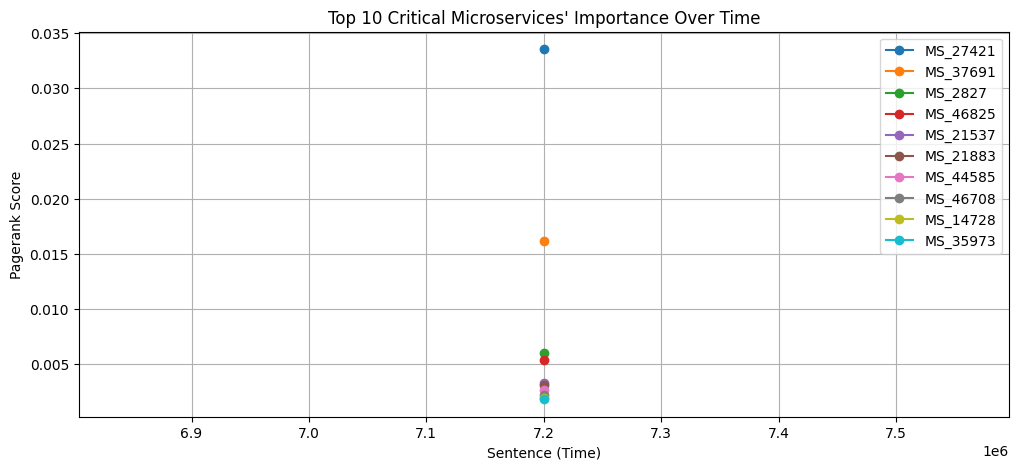

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from raphtory import algorithms as rp
from raphtory import Graph

# Function to lazily load graphs from files
def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Modify this list to include the actual paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 4)]
graphs_lazy = load_graphs_lazy(graph_paths)


for g in graphs_lazy:
    if g is None:
        continue  # Skip if the graph couldn't be loaded

    results = rp.pagerank(g)
    top_10 = results.top_k(10)

    # Initialise a dictionary to store time and importance scores for each ms based on the data provided in pagerank()
    service_data = {name: {'time': [], 'importance': []} for rank, (name, score) in enumerate(top_10, 1)}

    # Iterate through the top 10 ms and collect their importance scores over time
    for rank, (name, score) in enumerate(top_10, 1):
        print(f"Rank {rank}: {name} with a score of {score:.5f}")

        # Store for each ms the scores along with the corresponding time points.
        for windowed_graph in g.rolling(window=3600000):
            result = rp.pagerank(windowed_graph)
            service_data[name]['time'].append(windowed_graph.earliest_time)
            service_data[name]['importance'].append(result.get(str(name)))

# Set up the plot
plt.figure(figsize=(12, 5))

# Plot each ms' importance over time
for name, data in service_data.items():
    plt.plot(data['time'], data['importance'], marker="o", label=name)

plt.xlabel("Sentence (Time)")
plt.ylabel("Pagerank Score")
plt.title("Top 10 Critical Microservices' Importance Over Time")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import algorithms as rp

# Get top 10 most important ms
results = rp.pagerank(g)
top_10 = results.top_k(10)

# Initialise a dictionary to store time and importance scores for each ms based on the data provided in pagerank()
service_data = {name: {'time': [], 'importance': []} for rank, (name, score) in enumerate(top_10, 1)}

# Iterate through the top 10 ms and collect their importance scores over time
for rank, (name, score) in enumerate(top_10, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

    # Store for each ms the scores along with the corresponding time points.
    for windowed_graph in g.rolling(window=6000000):
        result = rp.pagerank(windowed_graph)
        service_data[name]['time'].append(windowed_graph.earliest_time)
        service_data[name]['importance'].append(result.get(str(name)))

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each ms' importance over time
for name, data in service_data.items():
    plt.plot(data['time'], data['importance'], marker="o", label=name)

plt.xlabel("Sentence (Time)")
plt.ylabel("Pagerank Score")
plt.title("Top 10 Critical Microservices' Importance Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import os
from raphtory import Graph

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 3)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

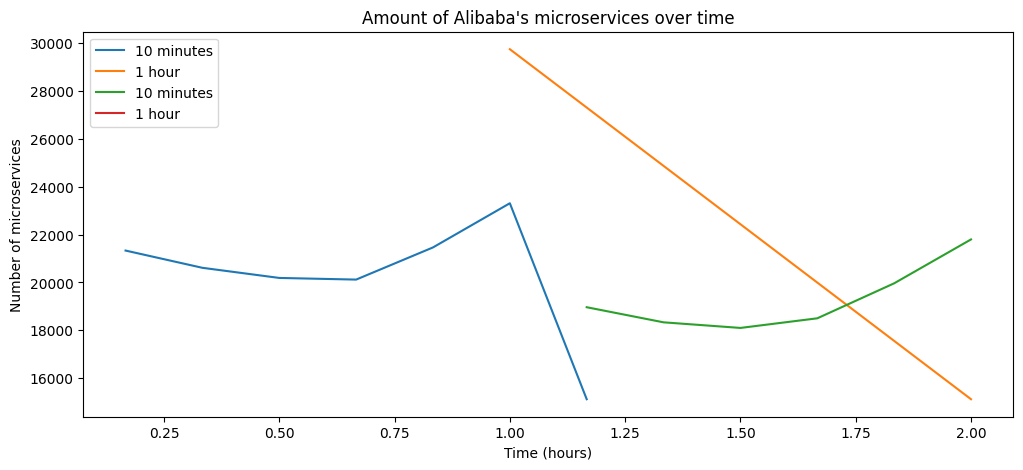

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

window_sizes = [600000, 3600000]  # Example window sizes in milliseconds
window_labels = ['10 minutes', '1 hour']  # Labels for the plot legend

plt.figure(figsize=(12, 5))

for g in graphs_lazy:

    for window_size, label in zip(window_sizes, window_labels):
        num_nodes = []
        time = []
        if g is not None:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                # Shift the time by the window size before converting to hours
                time_shifted = (windowed_graph.earliest_time + window_size) / 3600000
                time.append(time_shifted)
    
        plt.plot(time, num_nodes, label=label)

plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")
plt.legend()
plt.show()